### **LABORATORIO 04 (GRUPO 1 y GRUPO 2)**

Buscar un dataset para regresión logística multiclase, que contenga imagenes similares a MNIST, para entrenar un modelo con este dataset, y realizar las respectivas predicciones que demuestren la efectividad del mismo. Se debe subir los cuadernillos modificados, el dataset y todo aquello que considere necesario para completar con el ejercicio. Cada estudiante debe elegir un dataset diferente, para coordinar esto, se debe registrar el dataset elegido con la auxiliar de docencia (Daniela). Para la lectura, normalizacion y otras operaciones de preparacion del dataset se debe utilizar obligatoriamente la libreria pandas. Es impresindible demostrar la efectividad del modelo, considerando un porcentaje del 80% del total de los datos para entrenamiento y el 20% del total como datos de prueba, con los cuales se debe demostrar el error producido en ambos grupos y la respectiva efectividad. Para le proprocesado del dataset, se debe utilizar Pandas.

---
    *   Victor Manuel Tacuri Rengifo
    *   Ingenieria de Sistemas
    *   CU: 35-5210

---
[GitHub vmtacurir](https://github.com/vmtacurir)

In [76]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

import pandas as pd


# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [78]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/Lenguaje de señas MNIST/sign_mnist_train/sign_mnist_train.csv")
#imprime la cabezera
print(data.head())
data = data.to_numpy()

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [79]:
# Ingresar imágenes de dígitos de 20x20
#establece capa de entrada se convierte en un vector de 400 posiciones
input_layer_size  = 785
# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 24
#datos de entrenamiento almacenados en los arreglos X, y
#data = loadmat(os.path.join('Dataset', 'ex3data1.mat'))
#data = loadmat('/content/drive/MyDrive/Colab Notebooks/Datasets/ex3data1.mat' )

#X, y = data['X'], data['y'].ravel()
# establecer el dígito cero en 0, en lugar del 10 asignado a este conjunto de datos
# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
#y[y == 10] = 0

X = data[:, 1:]
y = data[:, 0]
print(y)
m = y.size
print(m)


[ 3  6  2 ... 18 17 23]
27455


In [80]:
#print (len(data['X'][0]))
#print(X[0][:])
#print(data['y'][0])
# print(data['X'][0])
#print(data['X'][0].shape)
#yy = data['X'][0].ravel()
#print(yy)
#print(yy.shape)

# print(X)
# print(y)
# print(m)

In [81]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='C'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

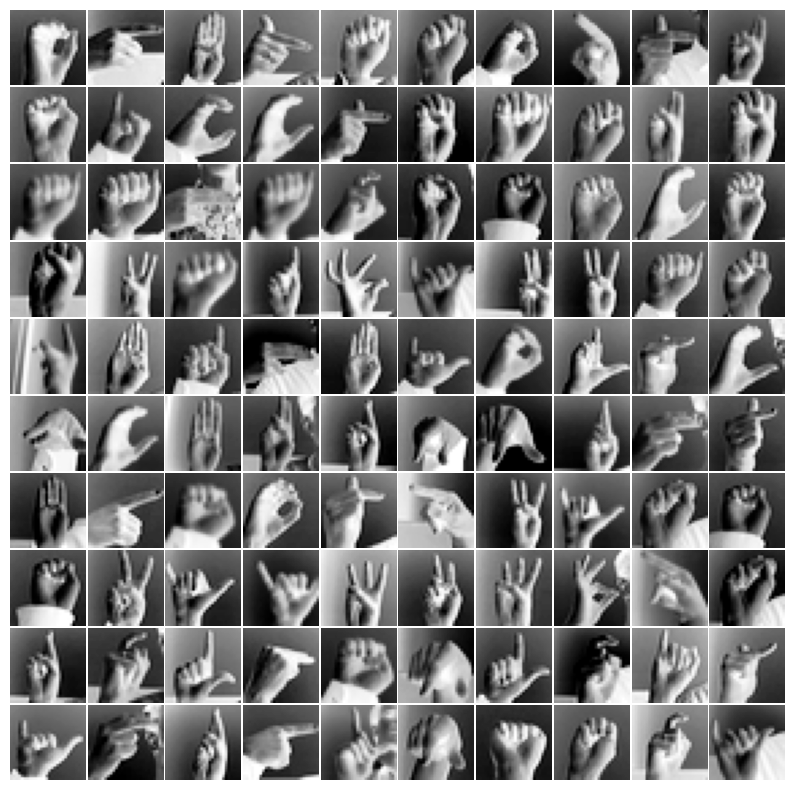

In [82]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

displayData(sel)

In [83]:
# hay que borrar esto
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

In [84]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    z = np.clip(z, -500, 500)  # Limitar los valores de z para evitar el desbordamiento
    return 1.0 / (1.0 + np.exp(-z))
    #return 1.0 / (1.0 + np.exp(-z))

In [85]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0
#funsion de costo + la regularizacion
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    J = (1 / m) * np.sum(-y.dot(np.log(h + 1e-10)) - (1 - y).dot(np.log(1 - h + 1e-10))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
#desenso por el gradiente para un determinado valor de theta
    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

  #grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp
    return J, grad

In [86]:
#prueba borrar
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.534819
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [0.146561, -0.548558, 0.724722, 1.398003]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


<a id="section2"></a>
### Clasificacion One-vs-all


In [87]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    # print(m, n)
    # vector de theta llenamos de 0 el numero de filas = al numero de columnas
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X en la primera columna
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
#contador va a ir calculando los thetas
    for c in np.arange(num_labels):
      #creamos otro vector lleno de ceros
        initial_theta = np.zeros(n + 1)
        #cunatas iteraciones
        options = {'maxiter': 50}
        #llamamos a nuestro optimize.minimize y pasamos lrcostfuction y los otros parametros
        res = optimize.minimize(lrCostFunction,
                                #esta es la variable que va a optimizar
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options)
        # print(res)
        #aqui estan las x y thetas optimizados
        all_theta[c] = res.x

    return all_theta

In [88]:
lambda_ = 0.001
all_theta = oneVsAll(X, y, num_labels, lambda_)

In [89]:
print(all_theta.shape)
print(all_theta[0])

(24, 785)
[-1.07598523e-04  5.52445648e-03  5.04297835e-03  2.02684195e-03
 -1.92232038e-04 -1.51927839e-04  2.25539541e-04 -8.65662176e-05
  5.39752493e-05 -2.59286875e-04 -6.36522606e-04 -7.00754369e-05
  2.68285324e-04  4.06730334e-04 -1.10805972e-04 -7.39193001e-04
 -1.02422681e-03 -1.18673570e-03 -1.30521590e-03 -1.02302319e-03
 -8.29797138e-04 -7.64324257e-04 -7.99203522e-04 -2.06325580e-04
  7.84874414e-04  1.09579546e-03  1.71036823e-03  2.23737446e-03
  1.83446510e-03  5.21747924e-03  4.36860526e-03  1.37544620e-03
 -5.93085210e-04 -5.59886914e-04 -1.98240779e-04 -3.82157189e-04
 -5.08956280e-04 -8.61221070e-04 -3.44287579e-04 -3.35289296e-04
 -1.83952390e-05  5.78006102e-04 -4.76132957e-04 -1.34021241e-03
 -1.01971702e-03 -1.22324220e-03 -1.13252056e-03 -6.57706794e-04
 -8.33927177e-04 -3.01129732e-04 -8.76128119e-04 -1.14629006e-03
 -1.12102846e-04  1.27026896e-03  1.96355969e-03  1.48816833e-03
  1.21596939e-03  5.10013569e-03  3.91047540e-03  7.32375332e-04
 -1.22909446e-0

In [90]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Lenguaje de señas MNIST/sign_mnist_test/sign_mnist_test.csv')
#imprime la cabezera
print(data.head())
data = data.to_numpy()

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      6     149     149     150     150     150     151     151     150   
1      5     126     128     131     132     133     134     135     135   
2     10      85      88      92      96     105     123     135     143   
3      0     203     205     207     206     207     209     210     209   
4      3     188     191     193     195     199     201     202     203   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     151  ...       138       148       127        89        82        96   
1     136  ...        47       104       194       183       186       184   
2     147  ...        68       166       242       227       230       227   
3     210  ...       154       248       247       248       253       236   
4     203  ...        26        40        64        48        29        46   

   pixel781  pixel782  pixel783  pixel784  
0       106       112       12

In [91]:
input_layer_size  = 784
num_labels = 24
X = data[:, 1:]
y = data[:, 0]
print(y)
m = y.size
print(m)


[ 6  5 10 ...  2  4  2]
7172


In [92]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    # todas las thetas por las X  y escoge las probabilidad mas alta y esto es la hipotesis
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

Una vez que haya terminado, se llama a la función `predictOneVsAll` usando el valor aprendido de $\theta$. Debería apreciarse que la precisión del conjunto de entrenamiento es de aproximadamente 95,1% (es decir, clasifica correctamente el 95,1% de los ejemplos del conjunto de entrenamiento).

(7172, 784)
Precision del conjuto de entrenamiento: 64.50%
(100, 784)
(100, 785)
[15 19 15  2  6  5  1 22 17  2 17  6  0 14 20  6 10 18 19 16  8  7 16 19
  5  7 22 10  8 16  1 22  1 12  5  2  1  0 20 21  7 11  6 18  3  1 18  6
 11 20  1  0 13  5 17 23  7 13  2  5  7 20  0 21 10 19  4 23 20  0  1  4
  6  1 10 17 17 17  6  4 21  3  0 15  0  0  8  7 18  7  1 18 16 18  4 16
 18 14 13  4] [15 19 15  2  6  5 10 22 21  2 24  6  0 14 20  6 10 22 19 12 24  7 13  6
 21  7 22 10 12 16  1 19  1 12  5  2  1  0 20 21  6 11  7 12  3  1 17  6
 17 21  1  0  8  2 10 23  7 12  2 21  7 20  0 21 10 19  4 23 20  0  1  4
  6  1  5 24 20 22  7  4 21 24 13 15 12  0  8  7 12  7  1 12 16  4  4 16
 22 14 13  4]


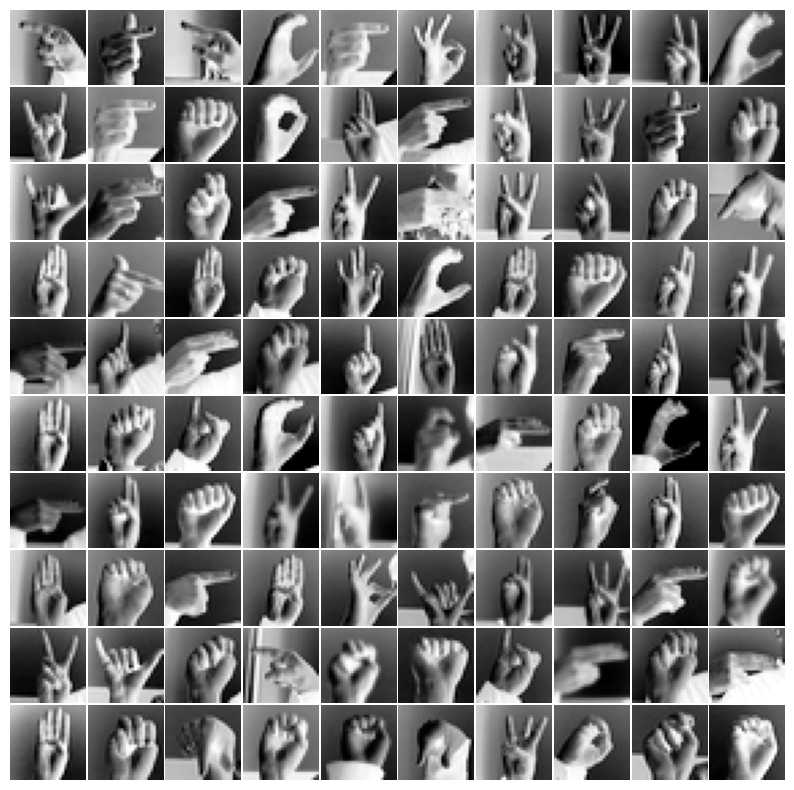

In [93]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
#saca la media y predice la y
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
# XPrueba = X[4490:4590, :].copy()

# Selecciona aleatoriamente 100 puntos de datos para mostrar
#y hacemos un random
rand_indices = np.random.choice(m, 100, replace=False)
XPrueba = X[rand_indices, :]
XPruebaV = XPrueba.copy()


print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
#modificar aqui
XPrueba = np.concatenate([np.ones((100, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print(p, y[rand_indices])

displayData(XPruebaV)